#          GRIP Data Science and Business Analytics
##                   TASK-1  Prediction Using Supervised ML.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
student_data=pd.read_csv(r"C:\Users\nehaa\Desktop\problem1.csv")
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
student_data.shape

(25, 2)

In [19]:
student_data.select_dtypes(include=["category"])

""
0
1
2
3
4
5
6
7
8
9


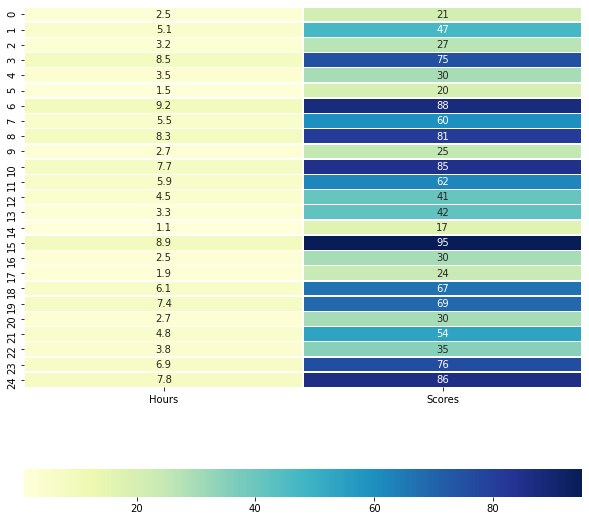

In [25]:
corre= student_data.corr()
top_corr_features=corre.index
plt.figure(figsize=(10,10))
g=sns.heatmap(student_data,annot=True,cmap="YlGnBu",cbar_kws={"orientation": "horizontal"},linewidths=.5)

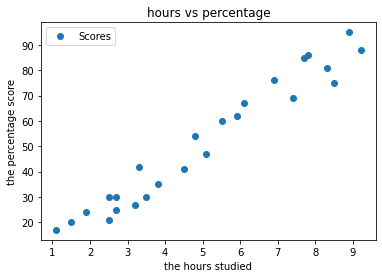

In [55]:
student_data.plot(x='Hours',y='Scores',style='o')
plt.title('hours vs percentage')
plt.xlabel('the hours studied')
plt.ylabel('the percentage score')
plt.show()

In [56]:
independent=student_data.iloc[:,:-1].values
dependent=student_data.iloc[:,1].values

In [58]:
from sklearn.model_selection import train_test_split
independent_train,independent_test,dependent_train, dependent_test=train_test_split(independent,dependent,test_size=0.3,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(independent_train,dependent_train)

LinearRegression()

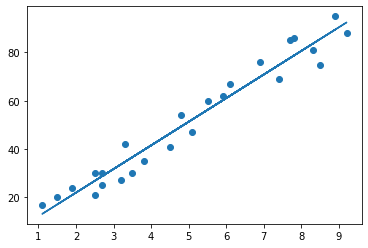

In [61]:
line=regressor.coef_*independent+regressor.intercept_
plt.scatter(independent,dependent)
plt.plot(independent,line)
plt.show()

In [62]:
print(independent_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [63]:
dependent_pred=regressor.predict(independent_test)

In [70]:
model=pd.DataFrame({'Actual':dependent_test,'Predicted': dependent_pred})

In [71]:
model

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [73]:
hours=[[9.25]]
own_pred=regressor.predict(hours)
print("number of hours={}".format(hours))
if own_pred[0]>100:
    print("prediction score is 100")
else:
    print("Prediction score={}".format(own_pred[0]))

number of hours=[[9.25]]
Prediction score=92.91505723477056


In [74]:
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(dependent_test,dependent_pred))

mean absolute error: 4.419727808027652


In [75]:
print('Variance Score:%2f' %regressor.score(independent_test,dependent_test))

Variance Score:0.956821


### End of Task-1